# Predicting the Condition of Tanzanian Water Wells: A Machine Learning Approach

## 1. Business Understanding

### Objectives
#### Main objective:
To predict the condition of water wells in Tanzania to ensure that clean and potable water is available to communities across Tanzania. 

#### Specific Objectives:

1. To understand the problem statement and the goal of the project
2. To identify the variables that can impact the functionality of water wells
3. To determine the target variable (functional, need repairs, or non-functional)

### Problem Statement
Lack of clean and potable water is a major issue in many communities across Tanzania. To address this issue, the Tanzanian Ministry of Water has installed several water wells across the country. However, not all of these wells are functioning as intended, which results in a lack of access to clean water for communities. The goal of this project is to use data from Taarifa and the Tanzanian Ministry of Water to predict which pumps are functional, which need some repairs, and which don't work at all.

### Goal
The goal of this project is to build a predictive model that can accurately predict the condition of water wells in Tanzania based on the variables provided in the data. By doing so, we aim to improve maintenance operations and ensure that clean and potable water is available to communities across Tanzania.

## 2. Data Understanding

1. Load and inspect the dataset
2. Check for missing values and handle them as necessary (e.g. imputation, deletion)
3. Perform exploratory data analysis (EDA) to understand the distributions and relationships between the variables
4. Get descriptive statistics of the variables, including mean, median, mode, and standard deviation
5. Visualize the relationships between variables, such as scatter plots, histograms, and box plots
6. Determine if the variables are suitable for the predictive modeling task (e.g. correct data type, no multicollinearity)

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the training set values and training set labels
train_values = pd.read_csv('TrainingSetValues.csv')
train_labels = pd.read_csv('TrainingSetLabels.csv')
test_df = pd.read_csv('TestSetValues.csv')

# Merge the two datasets
train_df = pd.merge(train_values, train_labels, on='id')

In [3]:
# Understanding the shape of the datasets
print("The train dataset has", train_df.shape[0], "rows and", train_df.shape[1], "columns.")
print("The test dataset has", test_df.shape[0], "rows and", test_df.shape[1], "columns.")


The train dataset has 59400 rows and 41 columns.
The test dataset has 14850 rows and 40 columns.


In [4]:
# Understanding the first 5 rows of the datasets
train_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [5]:
test_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [6]:
# Understanding the summary statistics of the dataset
train_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [7]:
# Understanding the number of missing values in the dataset
print("\nMissing Values in the dataset:")
print(train_df.isnull().sum().sum(), "missing values in the dataset")
print(train_df.isnull().sum())


Missing Values in the dataset:
46094 missing values in the dataset
id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
pa

In [8]:
# Check for duplicates
duplicates = train_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


In [9]:
# Understanding the distribution of the target variable
print("\nDistribution of the target variable:")
print(train_df['status_group'].value_counts(normalize=True))


Distribution of the target variable:
functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


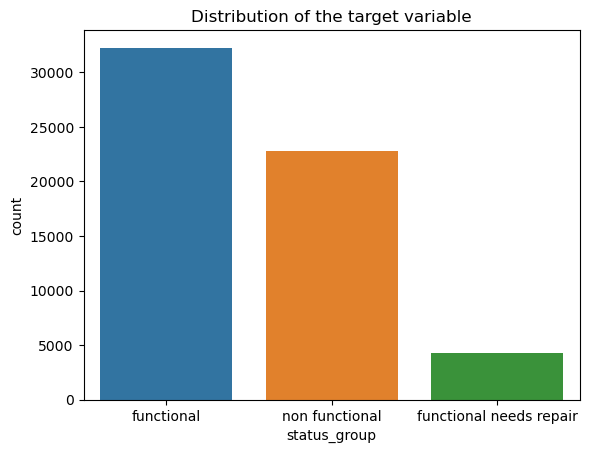

In [10]:
# Plotting the distribution of the target variable
sns.countplot(x='status_group', data=train_df)
plt.title("Distribution of the target variable")
plt.show()


## 3. Data Preparation

## 4. Modeling

## 5. Evaluation

## 6. Challenging the Solution

## 7. Conclusion and Recommendations